In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

In [2]:
dep_var_path = r"C:\Users\soere\OneDrive\Desktop\Python MA\2.2 Saving the Dependent Variables"

control_var_path = r"C:\Users\soere\OneDrive\Desktop\Python MA\1.2 Saving the Independent Variables"

ifo_path = r"C:\Users\soere\OneDrive\Desktop\Python MA\0.3 ifo Data"

In [3]:
df_total = pd.read_csv(f"{dep_var_path}\Total_Dep.csv")

county_names_df = pd.read_csv(f"{control_var_path}\Independent Variables.csv")

# Load the data from the sheet "Tabelle1"
ifo_data = pd.read_excel(f"{ifo_path}\ifo Dictionary Identification.xlsx", sheet_name="Tabelle1")

In [4]:
Berlin = county_names_df[county_names_df["NAME"] == "BERLIN"]

In [5]:
Berlin

,id_inequality,rb_id,rb_name,province_id,s_industry,s_prot,s_german,longitud,latitud,slope_km,...,mean_preci,dist_100km,log_distance_carbon_c,NAME,county_name,uni_dummy,min_distance_uni,prov_cap_dummy,BER_dummy,density
67,78.0,4.0,Berlin,13.0,54.075375,81.550382,98.40183,13.404971,52.519099,0.045,...,47.607,0.005,4.524796,BERLIN,Berlin,1,0.0,1,1,32.182064


In [6]:
df_total

,id_inequality,i_Grossbuchstabe,i_Ziffer,d_Hauptberuf_m,d_Hauptberuf_w,rb_id,d_Hauptberuf,high,medium,low,unskilled,intermediate,per_high,per_medium,per_low,per_unskilled
0,1.0,A,4,69.0,100.0,17.0,169.0,NaN,33.847785,135.152215,NaN,NaN,0.0,0.200283,0.799717,0.000000
1,2.0,A,4,155.0,44.0,17.0,199.0,NaN,39.856268,159.143732,NaN,NaN,0.0,0.200283,0.799717,0.000000
2,4.0,A,4,68.0,0.0,17.0,68.0,NaN,13.619227,54.380773,NaN,NaN,0.0,0.200283,0.799717,0.000000
3,5.0,A,4,85.0,11.0,17.0,96.0,NaN,19.227144,76.772856,NaN,NaN,0.0,0.200283,0.799717,0.000000
4,6.0,A,4,376.0,68.0,17.0,444.0,NaN,88.925542,355.074458,NaN,NaN,0.0,0.200283,0.799717,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76473,698.0,A,1,6929.0,4864.0,1.0,11793.0,NaN,1608.452868,2445.051798,7739.495334,NaN,0.0,0.136390,0.207331,0.656279
76474,699.0,A,1,3807.0,3802.0,31.0,7609.0,NaN,1013.316352,1573.447001,5022.236647,NaN,0.0,0.133173,0.206788,0.660039
76475,700.0,A,1,2647.0,300.0,31.0,2947.0,NaN,392.461991,609.403116,1945.134893,NaN,0.0,0.133173,0.206788,0.660039
76476,701.0,A,1,3313.0,3884.0,31.0,7197.0,NaN,958.448913,1488.250502,4750.300585,NaN,0.0,0.133173,0.206788,0.660039


Wie viele Leute arbeiten in der Kohleindustrie?

In [7]:
sum_coal = df_total[(df_total["i_Grossbuchstabe"] == "B") & (df_total["i_Ziffer"] == 4)]["d_Hauptberuf"].sum()
sum_d_Hauptberuf = df_total["d_Hauptberuf"].sum()
share_coal = sum_coal / sum_d_Hauptberuf
print(f"the share of people who work in the coal mining industry is: {share_coal} (absolute number: {sum_coal})")

the share of people who work in the coal mining industry is: 0.034274512878718896 (absolute number: 544669.0)


In [8]:
sum_d_Hauptberuf

15891371.0

In [9]:
# Filter the rows where i_Grossbuchstabe is 'B' and i_Ziffer is 4 (Coal Industry)
coal_industry = df_total[(df_total["i_Grossbuchstabe"] == "B") & (df_total["i_Ziffer"] == 4)]

# Group by 'id_inequality' 
sum_coal = coal_industry.groupby("id_inequality")["d_Hauptberuf"].sum().reset_index()
sum_coal = sum_coal.rename(columns={"d_Hauptberuf": "sum_coal"})

# drop coal (B4)
df_total_wo_coal = df_total[~((df_total["i_Grossbuchstabe"] == "B") & (df_total["i_Ziffer"] == 4))]
final_wo_coal = df_total_wo_coal.groupby("id_inequality")[["d_Hauptberuf", "high", "medium", "low", "unskilled"]].sum().reset_index()

# Group by 'id_inequality' and sum the 'd_Hauptberuf' for all industries
sum_d_Hauptberuf = df_total.groupby("id_inequality")[["d_Hauptberuf", "high", "medium", "low", "unskilled"]].sum().reset_index()

# Merge the two dataframes to create the 'coal_hotspots' dataframe
coal_hotspots = pd.merge(sum_d_Hauptberuf, sum_coal, on="id_inequality", how="left")

# Replace NaN values with 0 in 'sum_coal'
coal_hotspots["sum_coal"] = coal_hotspots["sum_coal"].fillna(0)

coal_hotspots["s_coal"] = coal_hotspots["sum_coal"] / coal_hotspots["d_Hauptberuf"]

coal_hotspots


,id_inequality,d_Hauptberuf,high,medium,low,unskilled,sum_coal,s_coal
0,1.0,25514.0,194.671849,5581.089181,5694.943234,14043.295736,0.0,0.000000
1,2.0,20208.0,188.102372,4557.120081,4876.411387,10586.366160,7.0,0.000346
2,4.0,93696.0,1811.855253,33907.963841,35872.296717,22103.884188,8.0,0.000085
3,5.0,17766.0,98.288151,3602.790861,2441.766712,11623.154277,1.0,0.000056
4,6.0,20770.0,82.905469,4117.252106,2671.725415,13898.117010,8.0,0.000385
...,...,...,...,...,...,...,...,...
570,698.0,21013.0,238.080140,3416.156704,7972.780302,9385.982854,5.0,0.000238
571,699.0,11822.0,90.073401,2969.535729,2810.769164,5951.621706,0.0,0.000000
572,700.0,4463.0,17.634545,1018.527521,1137.831985,2289.005948,0.0,0.000000
573,701.0,12392.0,55.629951,3311.096550,3004.208412,6021.065087,1.0,0.000081


In [10]:
coal_hotspots = pd.merge(coal_hotspots, county_names_df[["id_inequality", "county_name"]], on="id_inequality", how="left")

In [11]:
coal_hotspots

,id_inequality,d_Hauptberuf,high,medium,low,unskilled,sum_coal,s_coal,county_name
0,1.0,25514.0,194.671849,5581.089181,5694.943234,14043.295736,0.0,0.000000,Memel
1,2.0,20208.0,188.102372,4557.120081,4876.411387,10586.366160,7.0,0.000346,Fischhausen
2,4.0,93696.0,1811.855253,33907.963841,35872.296717,22103.884188,8.0,0.000085,Koenigsberg Stadt
3,5.0,17766.0,98.288151,3602.790861,2441.766712,11623.154277,1.0,0.000056,Koenigsberg Land
4,6.0,20770.0,82.905469,4117.252106,2671.725415,13898.117010,8.0,0.000385,Labiau
...,...,...,...,...,...,...,...,...,...
570,698.0,21013.0,238.080140,3416.156704,7972.780302,9385.982854,5.0,0.000238,Malmedy
571,699.0,11822.0,90.073401,2969.535729,2810.769164,5951.621706,0.0,0.000000,Sigmaringen
572,700.0,4463.0,17.634545,1018.527521,1137.831985,2289.005948,0.0,0.000000,Gammertingen
573,701.0,12392.0,55.629951,3311.096550,3004.208412,6021.065087,1.0,0.000081,Hechingen


In [12]:
s = coal_hotspots[coal_hotspots["s_coal"]>=0.2]
f = coal_hotspots["sum_coal"].sum()
k = s["sum_coal"].sum()

In [13]:
print(f"{(k / f)*100} % of the coal workers are excluded")

73.15764253151914 % of the coal workers are excluded


In [14]:
# Finding the top counties with the highest value in 's_coal'
top_10_coal_counties = coal_hotspots.sort_values(by="s_coal", ascending=False).head(50)[["id_inequality", "s_coal", "county_name"]]
top_10_coal_counties

,id_inequality,s_coal,county_name
443,539.0,0.621271,Gelsenkirchen Land
436,528.0,0.560449,Dortmund Land
439,534.0,0.547628,Bochum Land
416,503.0,0.512196,Recklinghausen Land
415,502.0,0.479870,Recklinghausen Stadt
441,536.0,0.471764,Herne
241,283.0,0.456163,Zabrze
517,631.0,0.446588,Essen Land
558,685.0,0.431067,Ottweiler
243,286.0,0.429212,Kattowitz Land


# Compare distributions of counties with coal included and without

In [15]:
final_wo_coal["per_high"] = final_wo_coal["high"] / final_wo_coal["d_Hauptberuf"]
final_wo_coal["per_medium"] = final_wo_coal["medium"] / final_wo_coal["d_Hauptberuf"]
final_wo_coal["per_low"] = final_wo_coal["low"] / final_wo_coal["d_Hauptberuf"]
final_wo_coal["per_unskilled"] = final_wo_coal["unskilled"] / final_wo_coal["d_Hauptberuf"]

coal_hotspots["per_high"] = coal_hotspots["high"] / coal_hotspots["d_Hauptberuf"]
coal_hotspots["per_medium"] = coal_hotspots["medium"] / coal_hotspots["d_Hauptberuf"]
coal_hotspots["per_low"] = coal_hotspots["low"] / coal_hotspots["d_Hauptberuf"]
coal_hotspots["per_unskilled"] = coal_hotspots["unskilled"] / coal_hotspots["d_Hauptberuf"]

In [16]:
# drop Berlin
final_wo_coal_BER = final_wo_coal[~(final_wo_coal["id_inequality"] == 78)]
coal_hotspots_BER = coal_hotspots[~(coal_hotspots["id_inequality"] == 78)]

In [17]:
manu_workers_df = df_total[df_total["i_Grossbuchstabe"] == "B"]
manu_workers = manu_workers_df["d_Hauptberuf"].sum()

share_coal_manu = f / manu_workers

print(f"share of coal workers of manufacturing workers: {share_coal_manu}")

share of coal workers of manufacturing workers: 0.08162305296883851


In [18]:
coal_workers_df = df_total[(df_total["i_Grossbuchstabe"] == "B") & (df_total["i_Ziffer"] == 4)]

s_high_c = coal_workers_df["high"].sum() / manu_workers_df["high"].sum()
s_medium_c = coal_workers_df["medium"].sum() / manu_workers_df["medium"].sum()
s_low_c = coal_workers_df["low"].sum() / manu_workers_df["low"].sum()
s_un_c = coal_workers_df["unskilled"].sum() /manu_workers_df["unskilled"].sum()

print()
print(f"share of highly skilled coal workers of total highly skilled workers: {s_high_c}")
print(f"share of medium skilled coal workers of total medium skilled workers: {s_medium_c}")
print(f"share of low skilled coal workers of total low skilled workers: {s_low_c}")
print(f"share of unskilled coal workers of total unilled workers: {s_un_c}")


share of highly skilled coal workers of total highly skilled workers: 0.15231198368975887
share of medium skilled coal workers of total medium skilled workers: 0.005619081862638325
share of low skilled coal workers of total low skilled workers: 0.18217013839335258
share of unskilled coal workers of total unilled workers: 0.09944575166179662


## High

C:\Users\soere\AppData\Local\Temp\ipykernel_14688\3469162030.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["{:.0f}%".format(x*100) for x in vals])


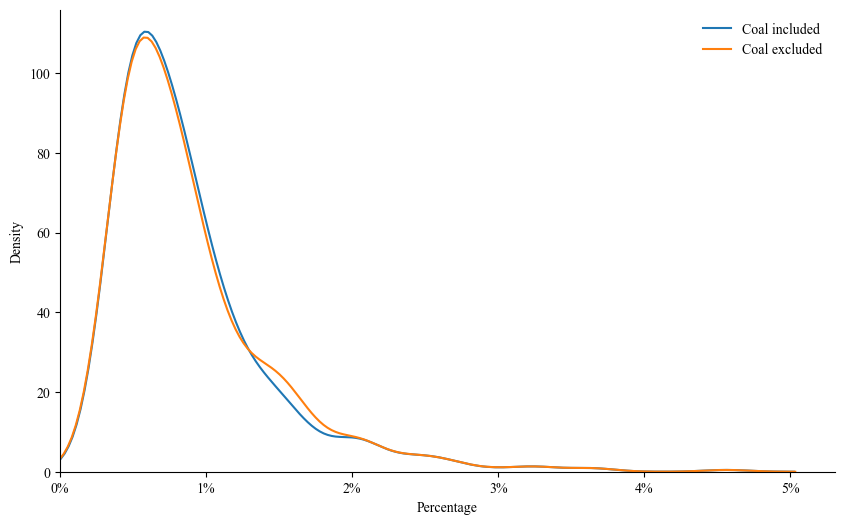

In [19]:
# Setting the font
plt.rcParams["font.family"] = "Times New Roman"

# Creating KDE plots
plt.figure(figsize=(10, 6))
sns.kdeplot(coal_hotspots["per_high"], label="Coal included", bw_adjust=1)
sns.kdeplot(final_wo_coal["per_high"], label="Coal excluded", bw_adjust=1)

# Removing the right and top spines
sns.despine()

# Additional settings
plt.xlabel("Percentage")
plt.ylabel("Density")
plt.legend(frameon=False)
plt.xlim(0, None)

# Set the x-axis to display percentages
ax = plt.gca()
vals = ax.get_xticks()
ax.set_xticklabels(["{:.0f}%".format(x*100) for x in vals])

plt.show()

In [20]:
ks_statistic, ks_p_value = ks_2samp(coal_hotspots["per_high"], final_wo_coal["per_high"])

print(f"KS Statistic: {ks_statistic}")
print(f"p-value: {ks_p_value}")

KS Statistic: 0.02608695652173913
p-value: 0.989768405114302


## Medium

C:\Users\soere\AppData\Local\Temp\ipykernel_14688\2743169612.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["{:.0f}%".format(x*100) for x in vals])


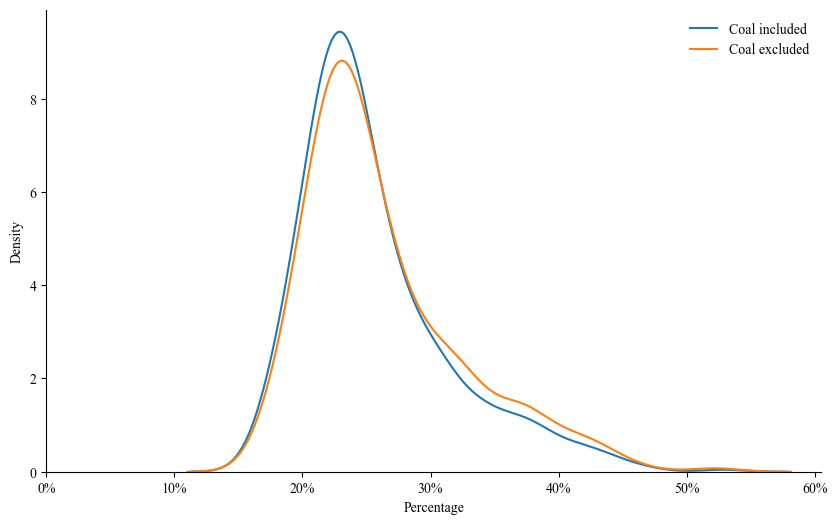

In [21]:
# Setting the font
plt.rcParams["font.family"] = "Times New Roman"

# Creating KDE plots
plt.figure(figsize=(10, 6))
sns.kdeplot(coal_hotspots["per_medium"], label="Coal included", bw_adjust=1)
sns.kdeplot(final_wo_coal["per_medium"], label="Coal excluded", bw_adjust=1)

# Removing the right and top spines
sns.despine()

# Additional settings
plt.xlabel("Percentage")
plt.ylabel("Density")
plt.legend(frameon=False)
plt.xlim(0, None)

# Set the x-axis to display percentages
ax = plt.gca()
vals = ax.get_xticks()
ax.set_xticklabels(["{:.0f}%".format(x*100) for x in vals])

plt.show()

In [22]:
ks_statistic, ks_p_value = ks_2samp(coal_hotspots["per_medium"], final_wo_coal["per_medium"])

print(f"KS Statistic: {ks_statistic}")
print(f"p-value: {ks_p_value}")

KS Statistic: 0.05217391304347826
p-value: 0.4145623960289897


# Low

C:\Users\soere\AppData\Local\Temp\ipykernel_14688\2177504877.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["{:.0f}%".format(x*100) for x in vals])


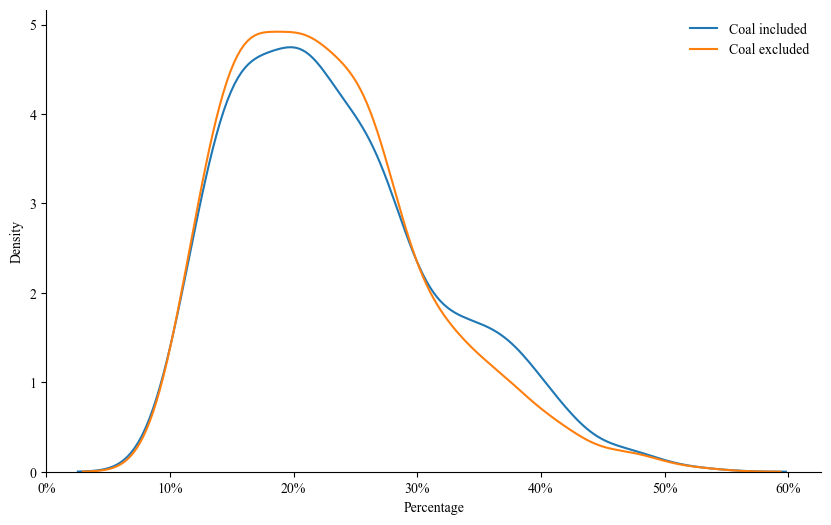

In [23]:
# Setting the font
plt.rcParams["font.family"] = "Times New Roman"

# Creating KDE plots
plt.figure(figsize=(10, 6))
sns.kdeplot(coal_hotspots["per_low"], label="Coal included", bw_adjust=1)
sns.kdeplot(final_wo_coal["per_low"], label="Coal excluded", bw_adjust=1)

# Removing the right and top spines
sns.despine()

# Additional settings
plt.xlabel("Percentage")
plt.ylabel("Density")
plt.legend(frameon=False)
plt.xlim(0, None)

# Set the x-axis to display percentages
ax = plt.gca()
vals = ax.get_xticks()
ax.set_xticklabels(["{:.0f}%".format(x*100) for x in vals])

plt.show()

In [24]:
ks_statistic, ks_p_value = ks_2samp(coal_hotspots["per_low"], final_wo_coal["per_low"])

print(f"KS Statistic: {ks_statistic}")
print(f"p-value: {ks_p_value}")

KS Statistic: 0.04869565217391304
p-value: 0.5033535104466723


## Unskilled

C:\Users\soere\AppData\Local\Temp\ipykernel_14688\2468755183.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["{:.0f}%".format(x*100) for x in vals])


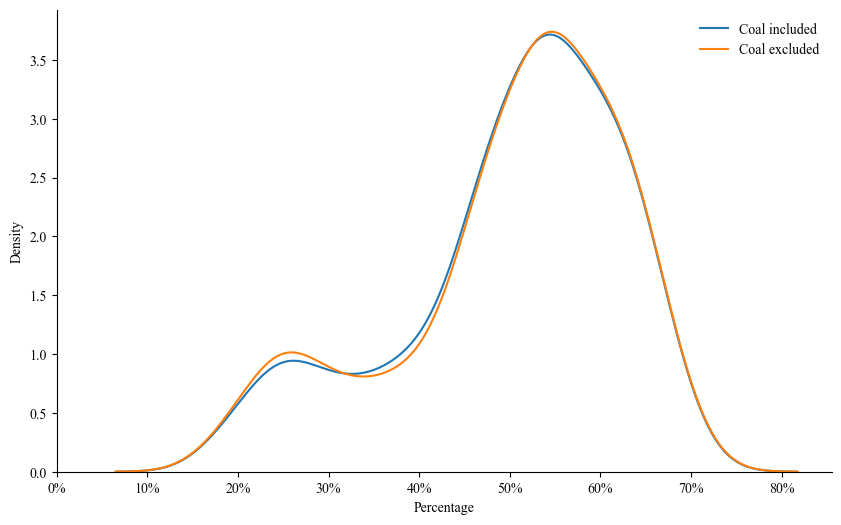

In [25]:
# Setting the font
plt.rcParams["font.family"] = "Times New Roman"

# Creating KDE plots
plt.figure(figsize=(10, 6))
sns.kdeplot(coal_hotspots["per_unskilled"], label="Coal included", bw_adjust=1)
sns.kdeplot(final_wo_coal["per_unskilled"], label="Coal excluded", bw_adjust=1)

# Removing the right and top spines
sns.despine()

# Additional settings
plt.xlabel("Percentage")
plt.ylabel("Density")
plt.legend(frameon=False)
plt.xlim(0, None)

# Set the x-axis to display percentages
ax = plt.gca()
vals = ax.get_xticks()
ax.set_xticklabels(["{:.0f}%".format(x*100) for x in vals])

plt.show()

In [26]:
ks_statistic, ks_p_value = ks_2samp(coal_hotspots["per_unskilled"], final_wo_coal["per_unskilled"])

print(f"KS Statistic: {ks_statistic}")
print(f"p-value: {ks_p_value}")

KS Statistic: 0.01217391304347826
p-value: 0.9999999999974721
